# UAS ARTIFICIAL INTELLIGENCE

### Nama : Rizki Valen Mafaza

### NIM : 09011281823134

### Kelas : Sistem Komputer 5 B

## Gender Recognition by Voice menggunakan Support Vector Machine

Disini saya akan memberikan salah satu contoh dalam Pengimplementasian Support Vector Machine untuk Pendeteksian Suara berdasarkan Gender. Saya menggunakan sumber data dari : https://www.kaggle.com/oktayozturk/visualization-and-svm-implementetion. 

Langkah pertama yang harus dilakukan adalah mengimport terlebih dahulu library yang akan digunakan. Beberapa library yang saya gunakan disini adalah sebagai berikut :
 - NumPy (Numerical Python), library ini digunakan untuk melakukan operasi perhitungan.
 - Pandas (Python for Data Analysis), library yang berfungsi untuk proses analisis data seperti manipulasi data, persiapan data, dan pembersihan data.
 - Matplotlib dan Seaborn digunakan untuk memvisualisasikan data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import dataset
data = pd.read_csv("D:/Artificial Intelligence/Visualization and SVM Implementation/voice.csv")

pd.read_csv('lokasi data dan nama data') digunakan untuk membaca data yang akan digunakan.

In [3]:
# Menampilkan lima baris pertama
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


Terdapat 5 baris dan 21 kolom pertama dalam dataset tersebut.

In [4]:
# Menampilkan lima baris terakhir
data.tail()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female
3167,0.165509,0.092884,0.183044,0.070072,0.250827,0.180756,1.705029,5.769115,0.938829,0.601529,...,0.165509,0.185607,0.062257,0.271186,0.227022,0.007812,0.554688,0.546875,0.350000,female


Penjelasan:

- meanfreq: frekuensi rata-rata (dalam kHz)
- sd: deviasi standar frekuensi
- median: frekuensi median (dalam kHz)
- Q25: first quantile (in kHz)
- Q75: third quantile (in kHz)
- IQR: interquantile range (in kHz)
- skew: skewness
- kurt: kurtosis 
- sp.ent: spectral entropy
- sfm: spectral flatness
- mode: mode frequency
- centroid: frequency centroid 
- peakf: frekuensi puncak (frekuensi dengan energi tertinggi)
- meanfun: rata-rata frekuensi dasar yang diukur pada sinyal akustik
- minfun: frekuensi fundamental minimum yang diukur pada sinyal akustik
- maxfun: frekuensi fundamental maksimum yang diukur pada sinyal akustik
- meandom: rata-rata frekuensi dominan yang diukur pada sinyal akustik
- mindom: frekuensi dominan minimum yang diukur melalui sinyal akustik
- maxdom: maksimum frekuensi dominan yang diukur pada sinyal akustik
- dfrange: rentang frekuensi dominan yang diukur pada sinyal akustik
- modindx: modulation index. Dihitung sebagai akumulasi perbedaan absolut antara pengukuran frekuensi dasar yang berdekatan dibagi - dengan rentang frekuensi
- label: male atau female

In [5]:
data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


data.describe() digunakan untuk menunjukkan rangkuman statistik seperti median, mean yang terdapat pada kolom.

### Clean and Normalization Data

Disini kita akan mengubah categorical data ke numeric data.

In [6]:
data.label = [1 if each == "female" else 0 for each in data.label ]
y = data.label.values
x_data = data.drop(["label"], axis = 1)

- Jika female, akan bernilai 1
- Jika male, akan bernilai 0

In [7]:
# Normalisasi data
x = (x_data -np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

### Visualisasi Data

Untuk dapat memvisualisasikan data, kita akan menggunakan matplotlib dan seaborn.

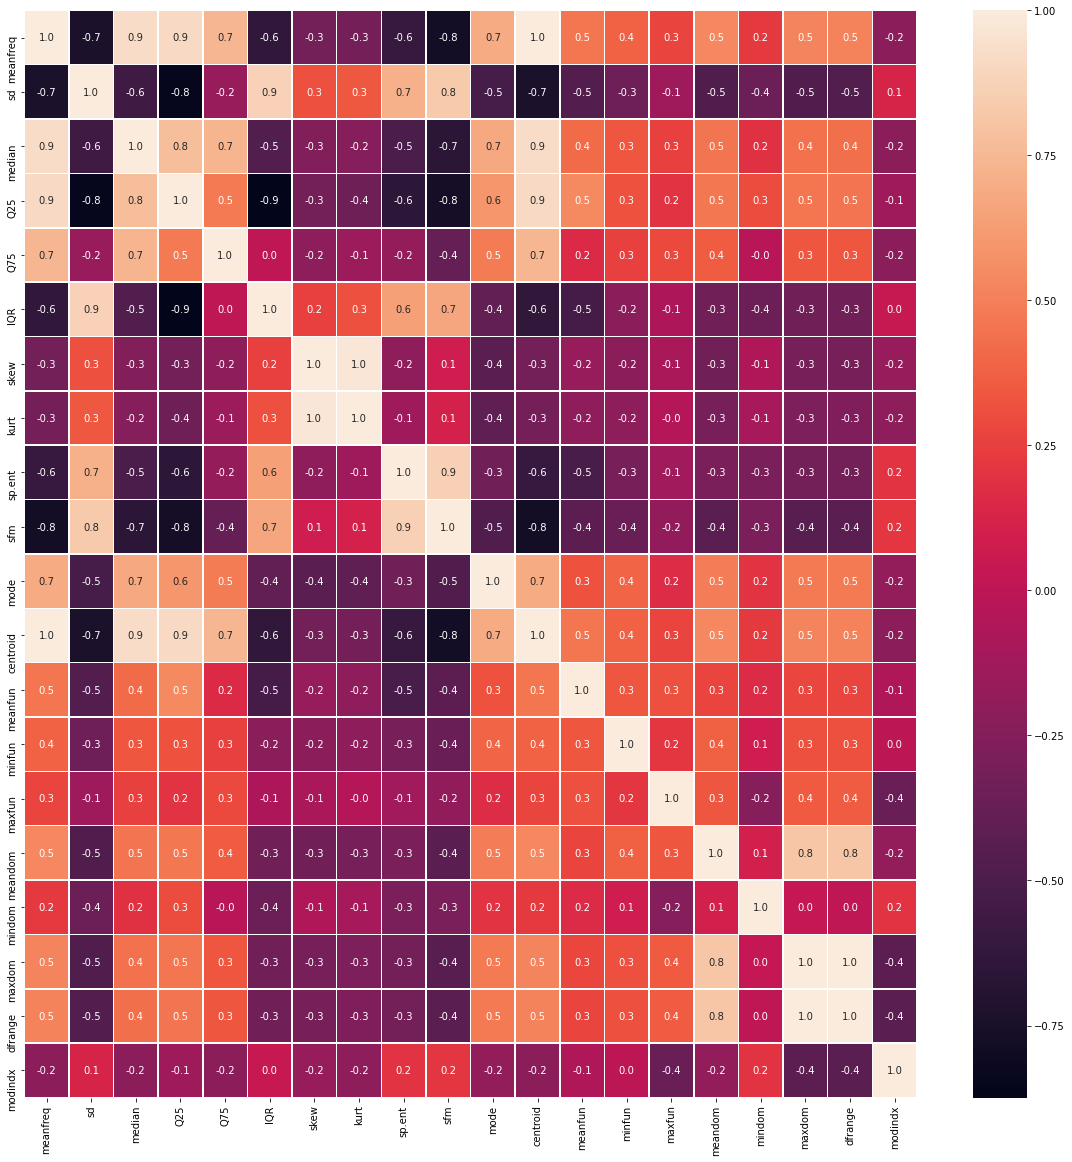

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [ ]:
sns.set(style="white")
df = x.loc[:,['meandom','mindom','maxdom']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

- g.map_lower : plot dengan fugsi bivariate pada subplot diagonal bawah.
- g.map_upper : plot dengan fugsi bivariate pada subplot diagonal atas.
- g.map_diag : plot dengan fugsi univariate pada subplot diagonal.

In [ ]:
# Plotting
data.plot(kind='scatter', x='meanfreq', y='dfrange')
data.plot(kind='kde', y='meanfreq')

In [ ]:
# Pairplotting
sns.pairplot(data[['meanfreq', 'Q25', 'Q75', 'skew', 'centroid', 'label']], 
                 hue='label', height=3)

Setelah melakukan perintah pairplotting ini, maka akan menghasilkan grafik yang akan menunjukkan hubungan antara setiap fitur numerik dengan memasangkan setiap fitur dengan fitur lainnya sesuai dengan banyaknya fitur dalam bingkai data yang digunakan.

###  Initializing, Optimizing, and Predicting

In [ ]:
# Train and test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

Train dan Test Split ini  merupakan fungsi dalam pemilihan model Sklearn untuk membagi array data menjadi dua subset yaitu untuk data pelatihan dan untuk data pengujian. Dengan fungsi ini, kita tidak perlu membagi dataset secara manual.

In [ ]:
# Mengimport SVM dari sklearn
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)

In [ ]:
# Testing
print("Print accuracy of svm algorithm: ", svm.score(x_test,y_test))

Setelah melakukan testing, dapat dilihat bahwa akurasi pengujian dari Support Vector Machine menghasilkan output yaitu 0.98 %.